In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

RANDOM_SEED = 42

In [149]:
FILE_PATH = 'Dataset/Covid.csv'

In [150]:
df=pd.read_csv(FILE_PATH, index_col=0, header=0)
df.head()
print(df.shape)

(230, 11)


In [151]:
cols = df.columns
cols

Index(['Country, Other', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
       'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population'],
      dtype='object')

In [152]:
df.drop(cols[0], axis=1, inplace=True)

Changing text data into numerical data by removing the commas.

In [153]:
df = df.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',', ''), errors='coerce'))

In [154]:
df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
count,2.300000e+02,2.250000e+02,2.140000e+02,2.150000e+02,147.000000,228.000000,223.000000,2.140000e+02,2.140000e+02,2.280000e+02
mean,2.705969e+06,2.909820e+04,2.807255e+06,5.744895e+04,270.224490,179621.846491,1197.968610,3.137011e+07,2.050888e+06,3.484620e+07
std,8.779899e+06,1.022137e+05,8.815291e+06,2.073823e+05,922.698201,182372.507626,1246.991628,1.144561e+08,3.490517e+06,1.389233e+08
min,9.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,2.364900e+04,2.020000e+02,1.968325e+04,1.320000e+02,4.500000,16932.500000,157.500000,3.462602e+05,1.807408e+05,5.170965e+05
50%,2.037110e+05,2.179000e+03,2.250110e+05,1.246000e+03,18.000000,117976.000000,777.000000,2.172044e+06,8.717415e+05,5.816378e+06
75%,1.256286e+06,1.412200e+04,1.437441e+06,1.923950e+04,101.000000,293122.750000,1953.000000,1.267585e+07,2.345814e+06,2.254928e+07
max,9.816690e+07,1.084282e+06,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


In [155]:
df.isnull().sum()

Total Cases           0
Total Deaths          5
Total Recovered      16
Active Cases         15
Serious, Critical    83
Tot Cases/ 1M pop     2
Deaths/ 1M pop        7
Total Tests          16
Tests/ 1M pop        16
Population            2
dtype: int64

In [157]:
df['Serious, Critical'].replace(np.nan, 0, inplace=True)

In [158]:
df = df.dropna(axis=0)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 224
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total Cases        200 non-null    int64  
 1   Total Deaths       200 non-null    float64
 2   Total Recovered    200 non-null    float64
 3   Active Cases       200 non-null    float64
 4   Serious, Critical  200 non-null    float64
 5   Tot Cases/ 1M pop  200 non-null    float64
 6   Deaths/ 1M pop     200 non-null    float64
 7   Total Tests        200 non-null    float64
 8   Tests/ 1M pop      200 non-null    float64
 9   Population         200 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 17.2 KB


<Axes: >

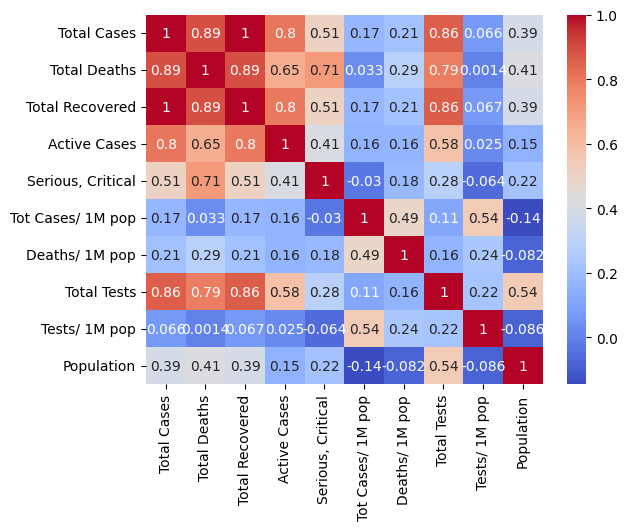

In [160]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

We Remove "Tests/ 1M pop", "Tot Cases/ 1M pop", "Deaths/ 1M pop" from the dataset to reduce dimensions.

In [162]:
columns_to_drop = ["Tests/ 1M pop", "Tot Cases/ 1M pop", "Deaths/ 1M pop"]
df = df.drop(columns_to_drop, axis=1)

In [163]:
X = df.drop('Total Deaths', axis=1)  # Features
y = df['Total Deaths']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [164]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

y_train = y_train.values.reshape(-1, 1)
y_train_scaled = sc.fit_transform(y_train)
y_test_scaled = y_test.values.reshape(-1, 1)
y_test_scaled = sc.transform(y_test_scaled)

## Ridge Regression

We check the performance of Ridge Regression for each value of alpha in `[0.5, 0.1, 0.01, 0.001, 0.0001]`.

In [174]:
alpha_values = [0.5, 0.1, 0.01, 0.001, 0.0001]
mse_per_alpha = []
score_per_alpha = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model = ridge_model.fit(X_train_scaled, y_train_scaled)
    ridge_predictions = ridge_model.predict(X_test_scaled)
    mse_ridge = mean_squared_error(y_test_scaled, ridge_predictions)

    mse_per_alpha.append(mse_ridge)
    score_per_alpha.append(ridge_model.score(X_test_scaled, y_test_scaled))

print(f"Minimum MSE: {min(mse_per_alpha)}")
print(f"Maximum Score: {max(score_per_alpha)}")

Minimum MSE: 0.0005491468481598167
Maximum Score: 0.9983616672640163


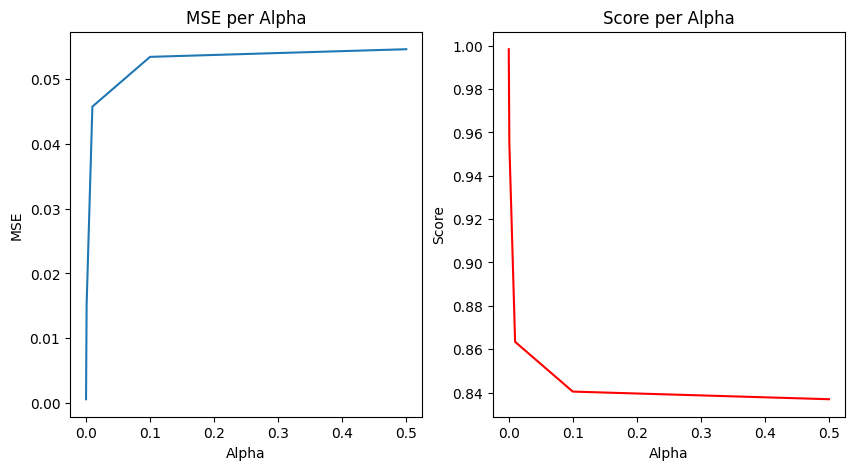

In [175]:
# plot the MSE and score for each alpha value on two separate graphs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_per_alpha)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE per Alpha')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, score_per_alpha, color='red')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Score per Alpha')

plt.show()

## Lasso Regression

We check the performance of Lasso Regression for each value of alpha in `[0.5, 0.1, 0.01, 0.001, 0.0001]`.

In [172]:
alpha_values = [0.5, 0.1, 0.01, 0.001, 0.0001]
mse_per_alpha = []
score_per_alpha = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model = lasso_model.fit(X_train_scaled, y_train_scaled)
    lasso_predictions = lasso_model.predict(X_test_scaled)
    mse_lasso = mean_squared_error(y_test_scaled, lasso_predictions)

    mse_per_alpha.append(mse_lasso)
    score_per_alpha.append(lasso_model.score(X_test_scaled, y_test_scaled))

print(f"Minimum MSE: {min(mse_per_alpha)}")
print(f"Maximum Score: {max(score_per_alpha)}")

Minimum MSE: 0.05322326775842223
Maximum Score: 0.8412129247816986


c:\Users\Pratham\Desktop\dir\Academics\MA515\Project\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.256e+00, tolerance: 1.600e-02
  model = cd_fast.enet_coordinate_descent(


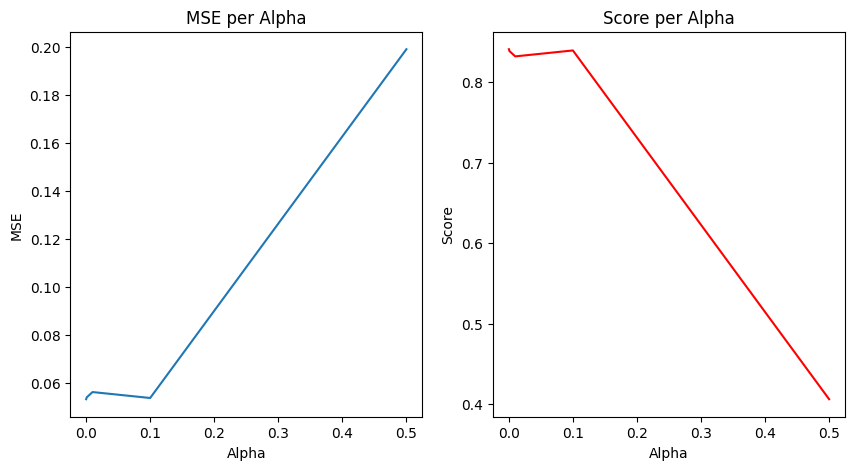

In [173]:
# plot the MSE and score for each alpha value on two separate graphs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_per_alpha)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE per Alpha')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, score_per_alpha, color='red')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Score per Alpha')

plt.show()

## PCA Regression

We check the performance of PCS Regression for each value of number of components in  in `[1, 2, 3, 4, 5, 6]`.

In [181]:
pca_components = 6

pca_mse = []
pca_score = []

for i in range(1, 7):
    pca = PCA(n_components=i)  # Choose the number of components
    X_train_pca = pca.fit_transform(X_train_scaled)

    pca_model = LinearRegression()
    pca_model.fit(X_train_pca, y_train_scaled)

    X_test_pca = pca.transform(X_test_scaled)
    pca_predictions = pca_model.predict(X_test_pca)

    mse_pca = mean_squared_error(y_test_scaled, pca_predictions)
    pca_mse.append(mse_pca)
    pca_score.append(pca_model.score(X_test_pca, y_test_scaled)) 

print(f"Minimum MSE: {min(pca_mse)}")
print(f"Maximum Score: {max(pca_score)}")


Minimum MSE: 8.681087552016294e-28
Maximum Score: 1.0


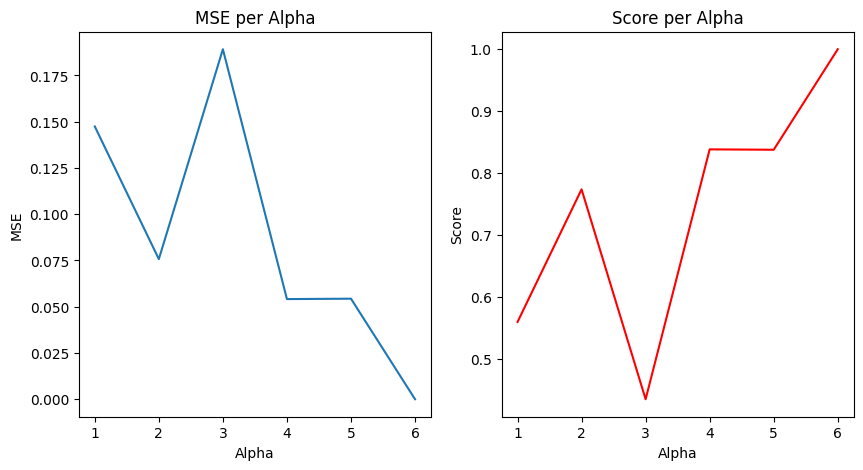

In [180]:
# plot the MSE and score for each alpha value on two separate graphs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(1, 7)], pca_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE per Alpha')

plt.subplot(1, 2, 2)
plt.plot([i for i in range(1, 7)], pca_score, color='red')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Score per Alpha')

plt.show()

### Drawing the percentage of each component in PCA

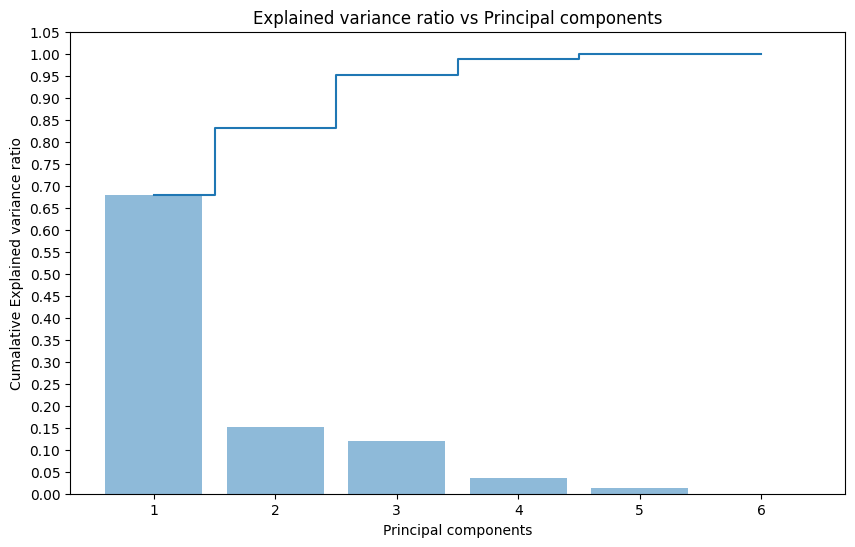

In [170]:
plt.figure(figsize=(10,6))
plt.bar(range(1,pca_components+1),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.step(range(1,pca_components+1),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Cumalative Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio vs Principal components')
plt.yticks(np.arange(0,1.1,0.05))
plt.show()
